# Example

James Bagrow

* * *

Let's explore [multi-exit KAN](https://dx.doi.org/10.1088/2632-2153/adf9bd) on the test function

$$f(x) = \frac{\sin(\pi x)}{\pi x}$$

In [1]:
import torch
import matplotlib.pyplot as plt

from kan import MultKAN as SingleExitKAN, create_dataset
from multi_exit_kan import MultiExitKAN, average_exit_loss

torch.set_default_dtype(torch.float64)

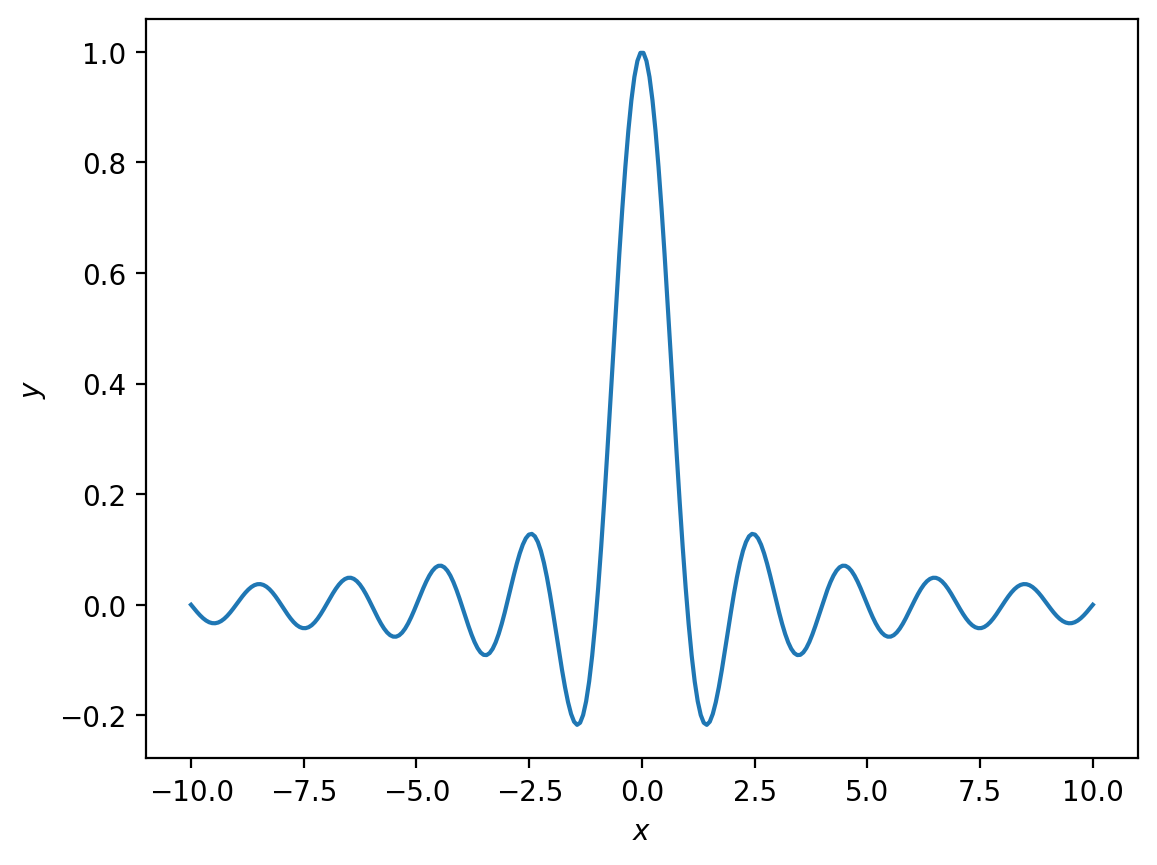

In [2]:
def f(x):
    return torch.sin(torch.pi * x) / (torch.pi * x) # sinc

xlim = (-10,10)
dataset = create_dataset(f, n_var=1, ranges=xlim)

x = torch.linspace(xlim[0],xlim[1], 300)
y = f(x)
plt.plot(x, y, '-')
plt.xlabel("$x$")
plt.ylabel("$y$");

## Single-exit KAN

In [3]:
steps = 30
shape = [1, 2, 2, 2, 1]

lamb = 0.0
list_G = [5,10,20]

model_single = SingleExitKAN(width=shape, grid=3, k=3)
results = model_single.fit(dataset, opt="LBFGS", steps=steps, lamb=lamb)
for G in list_G:
    model_single = model_single.refine(G)
    results = model_single.fit(dataset,
                        opt="LBFGS",
                        steps=steps,
                        lamb=lamb
                        )

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.37e-02 | test_loss: 4.25e-02 | reg: 1.89e+01 | : 100%|█| 30/30 [00:05<00:00,  5.56it


saving model version 0.1
saving model version 0.2


| train_loss: 3.51e-02 | test_loss: 3.63e-02 | reg: 2.09e+01 | : 100%|█| 30/30 [00:05<00:00,  5.54it


saving model version 0.3
saving model version 0.4


| train_loss: 1.84e-02 | test_loss: 2.14e-02 | reg: 2.09e+01 | : 100%|█| 30/30 [00:06<00:00,  4.73it


saving model version 0.5
saving model version 0.6


| train_loss: 1.27e-02 | test_loss: 1.54e-02 | reg: 2.08e+01 | : 100%|█| 30/30 [00:15<00:00,  1.93it

saving model version 0.7


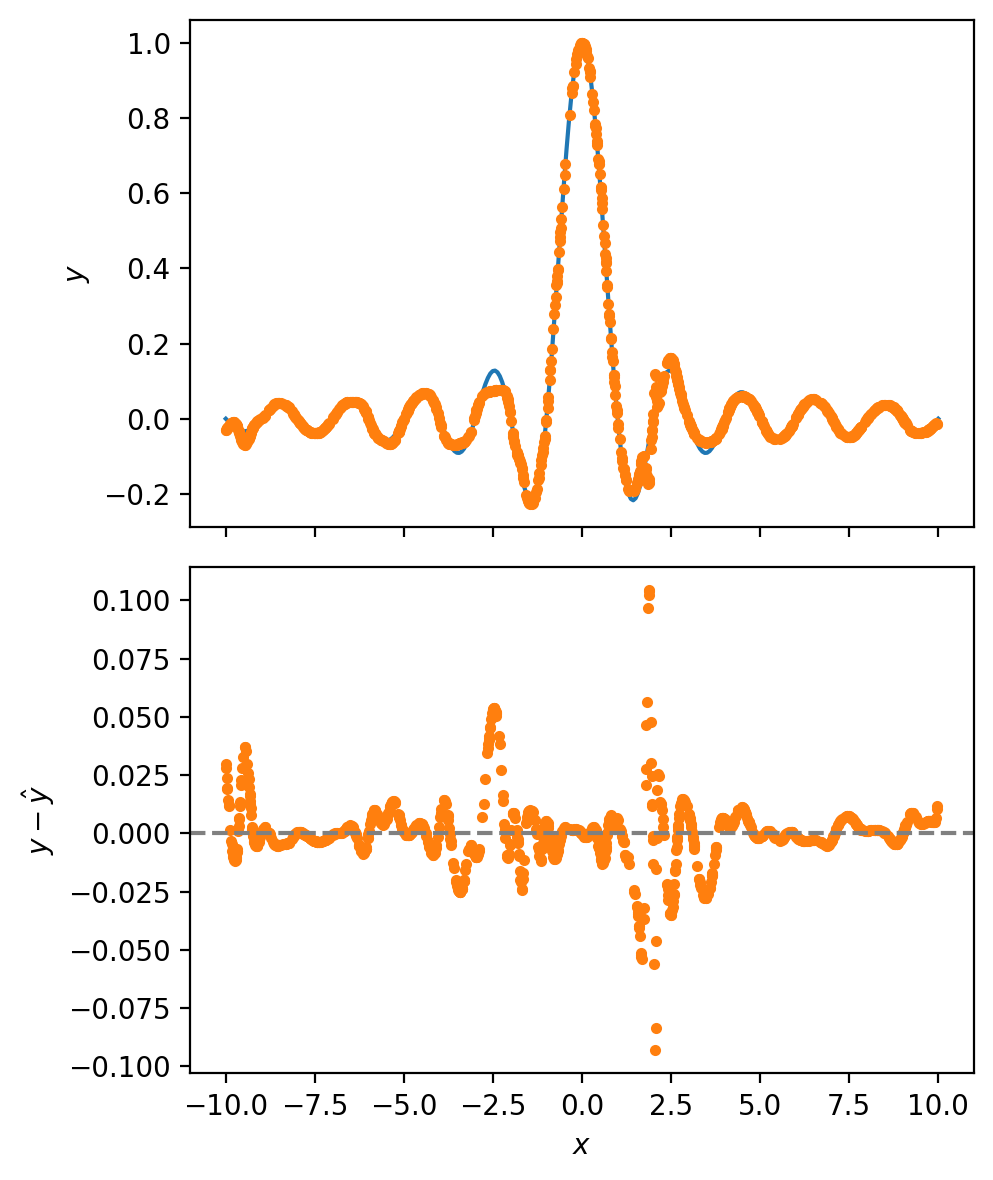

In [4]:
x_test = dataset['test_input']
y_test = dataset['test_label']
y_pred_single = model_single(x_test).detach()

fig, axs = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

# Prediction:
axs[0].plot(x, y, '-', color='C0')
axs[0].plot(x_test, y_pred_single, '.', color='C1')
axs[0].set_ylabel("$y$")

# Error:
axs[1].plot(x_test, y_test - y_pred_single, '.', color='C1')
axs[1].axhline(y=0, color='gray', linestyle='--')
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$y-\\hat{y}$")

plt.tight_layout()

## Multi-exit

In [5]:
model_multi = MultiExitKAN(width=shape, grid=3, k=3)

w = [1.0, 2.0, 3.0, 4.0]
weights = torch.tensor(w, device=model_multi.device)  # Match device with model
weights = weights / weights.sum()  # Normalize once
print(w, "->", weights)
custom_loss = lambda outputs, target: average_exit_loss(outputs, target, weights=weights)


results = model_multi.fit(dataset, 
                    opt="LBFGS", 
                    loss_fn=custom_loss,
                    steps=steps)
for G in list_G:
    model_multi = model_multi.refine(G)
    results = model_multi.fit(dataset,
                        opt="LBFGS",
                        loss_fn=custom_loss,
                        steps=steps,
                        )

checkpoint directory created: ./model
saving model version 0.0
[1.0, 2.0, 3.0, 4.0] -> tensor([0.1000, 0.2000, 0.3000, 0.4000])


| train_loss: 4.60e-02 | test_loss: 4.47e-02 | reg: 1.18e+01 | : 100%|█| 30/30 [00:07<00:00,  3.79it


saving model version 0.1
saving model version 0.2


| train_loss: 3.37e-02 | test_loss: 3.25e-02 | reg: 1.40e+01 | : 100%|█| 30/30 [00:08<00:00,  3.54it


saving model version 0.3
saving model version 0.4


| train_loss: 2.29e-02 | test_loss: 2.27e-02 | reg: 1.36e+01 | : 100%|█| 30/30 [00:10<00:00,  2.85it


saving model version 0.5
saving model version 0.6


| train_loss: 6.32e-03 | test_loss: 6.54e-03 | reg: 1.34e+01 | : 100%|█| 30/30 [00:25<00:00,  1.17it

saving model version 0.7


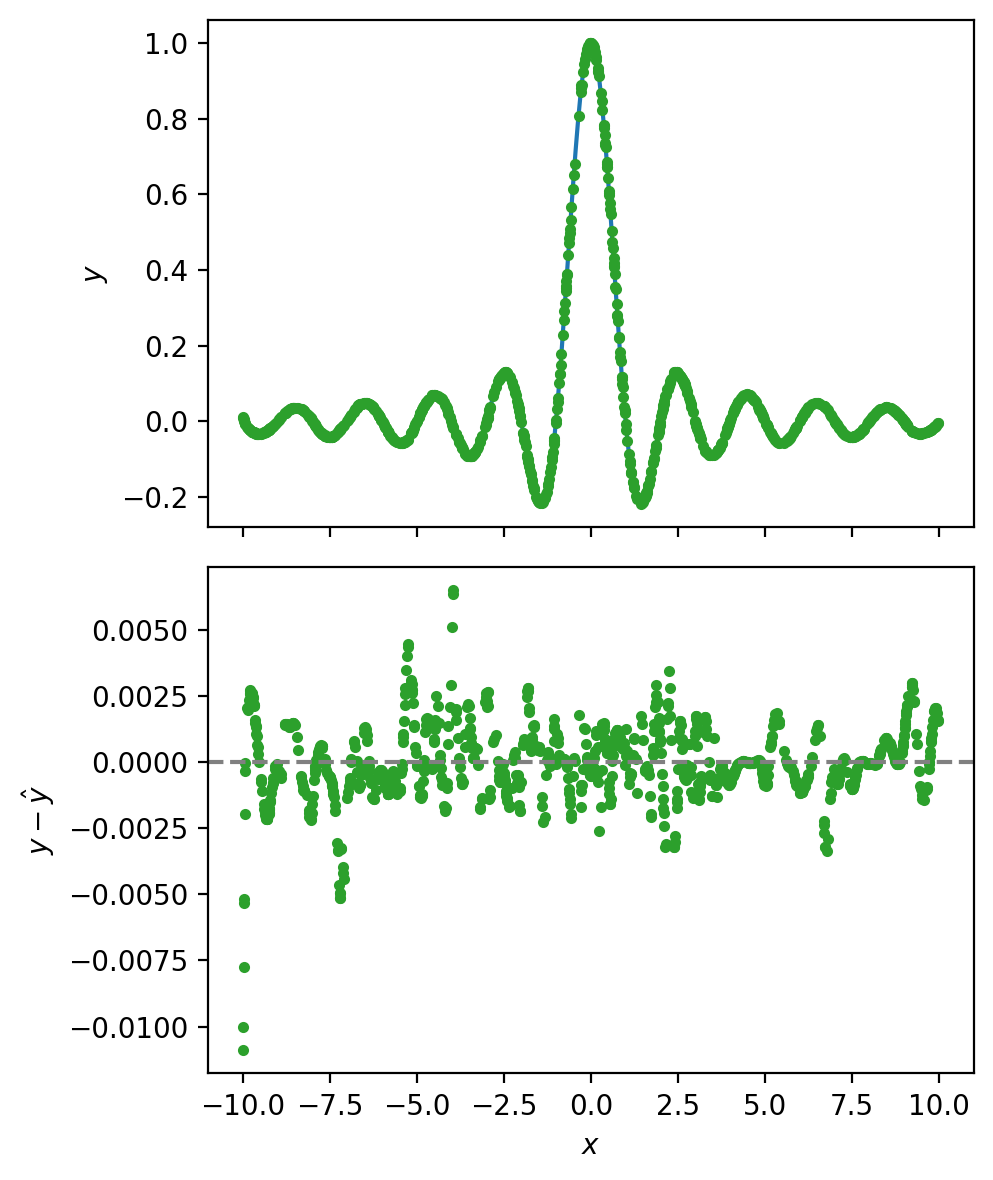

In [6]:
y_pred_multi = model_multi(x_test)[-1].detach() # last exit

fig, axs = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

# Prediction:
axs[0].plot(x, y, '-', color='C0')
axs[0].plot(x_test, y_pred_multi, '.', color='C2')
axs[0].set_ylabel("$y$")

# Error:
axs[1].plot(x_test, y_test - y_pred_multi, '.', color='C2')
axs[1].axhline(y=0, color='gray', linestyle='--')
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$y-\\hat{y}$")

plt.tight_layout()

## Citation

For more information, and to cite our work, please see our paper:

> Multi-exit Kolmogorov–Arnold networks: enhancing accuracy and parsimony  
> James Bagrow and Josh Bongard 2025 Mach. Learn.: Sci. Technol. 6 035037

- Journal link: https://dx.doi.org/10.1088/2632-2153/adf9bd  
- arXiv link: https://arxiv.org/abs/2506.03302


### BibTeX:
```bibtex
@article{Bagrow_2025,
    doi = {10.1088/2632-2153/adf9bd},
    url = {https://dx.doi.org/10.1088/2632-2153/adf9bd},
    year = {2025},
    month = {aug},
    publisher = {IOP Publishing},
    volume = {6},
    number = {3},
    pages = {035037},
    author = {Bagrow, James and Bongard, Josh},
    title = {Multi-exit Kolmogorov–Arnold networks: enhancing accuracy and parsimony},
    journal = {Machine Learning: Science and Technology},
}
```

### RIS:
```txt
TY  - JOUR
DO  - 10.1088/2632-2153/adf9bd
UR  - https://dx.doi.org/10.1088/2632-2153/adf9bd
TI  - Multi-exit Kolmogorov–Arnold networks: enhancing accuracy and parsimony
T2  - Machine Learning: Science and Technology
AU  - Bagrow, James
AU  - Bongard, Josh
PY  - 2025
DA  - 2025/08/21
PB  - IOP Publishing
SP  - 035037
IS  - 3
VL  - 6
SN  - 2632-2153
SN  - 
ER  - 
```
